In [ ]:
# import libraries for Cleaning and lemmatizing the text reviews field for better improvement of the model.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Importing required libraries
from termcolor import colored
import os
import pandas as pd
import numpy as np
import re
import nltk
import tarfile

# Enabling colored output in terminal (Windows-specific)
os.system('color')


32512

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# Opening the tar.gz file
file = tarfile.open('/content/drive/MyDrive/DataForDrive/unprocessed.tar.gz')

# Extracting the contents of the tar.gz file
file.extractall('/content')

# Closing the tar file
file.close()

# Function to get all review file paths
def get_all_review_paths(root_dir):
    all_review_paths = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file == 'all.review':  # Checking for files named 'all.review'
                full_path = os.path.join(root, file)
                all_review_paths.append(full_path)
    return all_review_paths

# Define the path to the 'sorted_data' directory
root_directory = '/content/sorted_data'

# Get all 'all.review' file paths
review_paths = get_all_review_paths(root_directory)
print(review_paths)

In [ ]:
# Regular expression pattern for parsing reviews
pattern = r"""
<review>\s*
<unique_id>(.*?)</unique_id>\s*
<unique_id>(.*?)</unique_id>\s*
<asin>(.*?)</asin>\s*
<product_name>(.*?)</product_name>\s*
(?:<product_type>(.*?)</product_type>\s*)+
<helpful>(.*?)</helpful>\s*
<rating>(.*?)</rating>\s*
<title>(.*?)</title>\s*
<date>(.*?)</date>\s*
<reviewer>(.*?)</reviewer>\s*
<reviewer_location>(.*?)</reviewer_location>\s*
<review_text>(.*?)</review_text>\s*
</review>
"""

In [ ]:
# Function to build a DataFrame from review files
def build_dataframe2(paths, pattern):
    df_list = []
    for path in paths:
        with open(path, encoding='latin-1') as f:
            data = f.read()

        data = data[:10000000] # Not using all of the reviews.
        data = re.sub(r'\s+', ' ', data)  # Clean up whitespace issues

        matches = re.findall(pattern, data, re.DOTALL | re.VERBOSE)
        columns = ["unique_id_full", "unique_id", "asin", "product_name", "product_type_last",
                   "helpful", "rating", "title", "date", "reviewer", "reviewer_location", "review_text"]

        df = pd.DataFrame(matches, columns=columns)
        # print(colored('hello', 'red'), colored('world', 'green'))
        print('\n\n',colored(str(path),'red'),  'has:',colored(str(len(df)),'green'),  'rows')
        df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)  # Updated line
        df_list.append(df)
    final_df = pd.concat(df_list, ignore_index=True)
    return final_df


In [ ]:
# Build the training and testing DataFrame. Since I have Already done this no need to do this again.
# test_df=build_dataframe2(test_paths,pattern)

In [ ]:
# Build the training and testing DataFrame. Since I have Already done this no need to do this again.
train_df=build_dataframe2(review_paths,pattern)

In [ ]:
print(f'Train DataFrame length: {len(train_df)} ')

Train DataFrame length: 37541 


In [ ]:
# prompt: convert rating to float

train_df['rating'] = train_df['rating'].astype(float)
# test_df['rating'] = test_df['rating'].astype(float)


In [ ]:
# import pandas as pd
# train_df=pd.read_csv('/content/drive/MyDrive/Sentiment_Model/amazon_reviews_allData.csv')

In [ ]:
# train_df.head()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unique_id_full     37541 non-null  object        
 1   unique_id          37541 non-null  object        
 2   asin               37541 non-null  object        
 3   product_name       37541 non-null  object        
 4   product_type_last  37541 non-null  object        
 5   helpful            37541 non-null  object        
 6   rating             37541 non-null  float64       
 7   title              37541 non-null  object        
 8   date               37539 non-null  datetime64[ns]
 9   reviewer           37541 non-null  object        
 10  reviewer_location  37541 non-null  object        
 11  review_text        37541 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 3.4+ MB


In [ ]:
# Importing the saved dataframe file after I applied build_dataframe fuction to it, which took quite a time.
train_df=pd.read_csv('/content/drive/MyDrive/Sentiment_Model/amazon_reviews_reviews&sentiment_processed_allData.csv')

In [ ]:
train_df.head()

,Unnamed: 0,review_text,sentiment
0,0,"book good point . anything , help put word wan...",1
1,1,fatalistic view conservativism expressed kirk ...,1
2,2,"intrigued title , supposedly link jedi wisdom ...",1
3,3,"admit , n't finished book . friend recommended...",1
4,4,tried reading book found turgid poorly written...,1


In [ ]:
## Looking at reviews
train_df.head()['review_text']

0    book good point . anything , help put word wan...
1    fatalistic view conservativism expressed kirk ...
2    intrigued title , supposedly link jedi wisdom ...
3    admit , n't finished book . friend recommended...
4    tried reading book found turgid poorly written...
Name: review_text, dtype: object

In [ ]:
# Function to categorize rating into sentiment
def categorize_rating(rating):
    if rating > 3.0:
        return 0
    elif rating < 3.0:
        return 1

In [ ]:
# Apply the categorize_rating function to 'rating' column
train_df['sentiment'] = train_df['rating'].apply(categorize_rating)
# test_df['sentiment'] = test_df['rating'].apply(categorize_rating)


In [ ]:
# Select only 'review_text' and 'sentiment' columns, because that is all we need for our model to train.
# Wr can improve the model if we use other columns, which will be done in the future.
train_df=train_df[['review_text','sentiment']]
# test_df=test_df[['review_text','sentiment']]

In [ ]:
# Saving train_df=train_df[['review_text','sentiment']] So that all work done upto now is not invain.
train_df.to_csv('amazon_reviews_allData.csv')
# test_df.to_csv('amazon_reviews_only_reviews&sentiment_test1.csv')

In [ ]:
train_df[train_df['sentimnts']==0].head()['review_text']

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words: like a, the, he, she, it, you etc.
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text


# Apply the preprocess_text function to 'review_text' column
train_df['review_text'] = train_df['review_text'].apply(preprocess_text)
# test_df['review_text'] = test_df['review_text'].apply(preprocess_text)
# test_df

In [ ]:
import pandas as pd
train_df=pd.read_csv('/content/drive/MyDrive/Sentiment_Model/amazon_reviews_reviews&sentiment_processed_allData.csv')

In [ ]:
# Count the number of each sentiment
train_df['sentiment'].value_counts()

sentiment
0    30510
1     7031
Name: count, dtype: int64

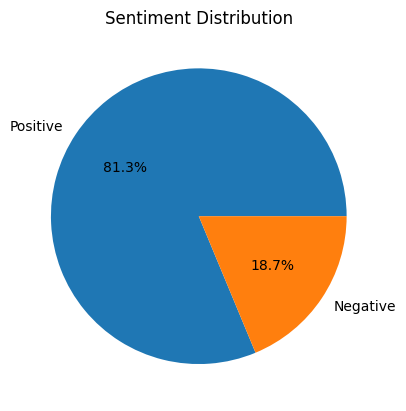

In [ ]:
# Plot the sentiment distribution as a pie chart

import matplotlib.pyplot as plt

# Get the value counts of the 'sentiment' column
sentiment_counts = train_df['sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
# Balance the dataset to have an equal number of positive and negative reviews

df_0 = train_df[train_df['sentiment'] == 0]
df_1 = train_df[train_df['sentiment'] == 1]

df_0_sample = df_0.sample(n=len(df_1))
df_balanced = pd.concat([df_0_sample, df_1], ignore_index=True)

df_balanced['sentiment'].value_counts()


sentiment
0    7031
1    7031
Name: count, dtype: int64

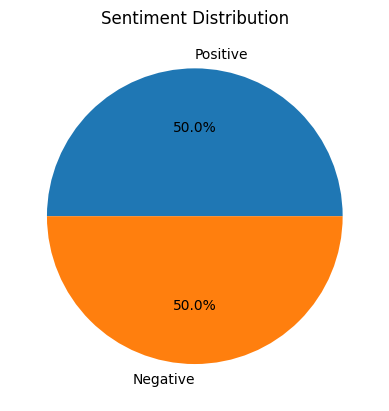

In [ ]:
# Plot the balanced sentiment distribution
import matplotlib.pyplot as plt

# Get the value counts of the 'sentiment' column
sentiment_counts = df_balanced['sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
# Save the balanced DataFrame to a CSV file
df_balanced.to_csv('amazon_reviews_reviews&sentiment_processed_BalancedData.csv')
# test_df.to_csv('amazon_reviews_reviews&sentiment_processed_test.csv')

## Getting Ready for Training the Model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dropout

In [ ]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_balanced['review_text'], df_balanced['sentiment'], test_size=0.3, random_state=23)
X_test, X_val2, y_test, y_val2 = train_test_split(X_val, y_val, test_size=0.3, random_state=23)


In [ ]:
# Vectorize the text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val2_vectorized = vectorizer.transform(X_val2)


In [ ]:
# Convert the sparse matrix to a dense matrix
X_train_vectorized = X_train_vectorized.todense()
X_val2_vectorized = X_val2_vectorized.todense()

In [ ]:
# Convert labels to one-hot encoding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train))
y_val2_encoded = to_categorical(encoder.transform(y_val2))

In [ ]:
# Define a simple neural network model using TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_shape=(X_train_vectorized.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 because we have two classes


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model over epochs
history = model.fit(X_train_vectorized, y_train_encoded, epochs=8, batch_size=128,
                    validation_data=(X_val2_vectorized, y_val2_encoded), verbose=1)


Epoch 1/8
77/77 [==============================] - 11s 129ms/step - loss: 0.4983 - accuracy: 0.7639 - val_loss: 0.3187 - val_accuracy: 0.8712
Epoch 2/8
77/77 [==============================] - 11s 148ms/step - loss: 0.1827 - accuracy: 0.9329 - val_loss: 0.3160 - val_accuracy: 0.8791
Epoch 3/8
77/77 [==============================] - 11s 149ms/step - loss: 0.0647 - accuracy: 0.9809 - val_loss: 0.3945 - val_accuracy: 0.8752
Epoch 4/8
77/77 [==============================] - 12s 163ms/step - loss: 0.0171 - accuracy: 0.9965 - val_loss: 0.5144 - val_accuracy: 0.8578
Epoch 5/8
77/77 [==============================] - 13s 166ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 0.5466 - val_accuracy: 0.8752
Epoch 6/8
77/77 [==============================] - 9s 113ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.5963 - val_accuracy: 0.8673
Epoch 7/8
77/77 [==============================] - 10s 136ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.6367 - val_accuracy: 0.8681
Epoch 8

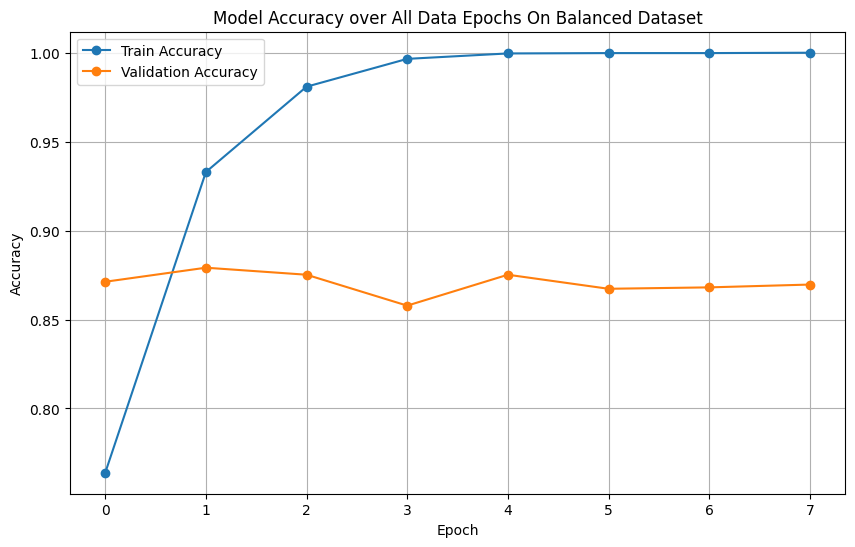

In [ ]:
# Plotting the model accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over All Data Epochs On Balanced Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the trained model
model.save('sentiment_analysis_model_on_allData_balaced_dataset.h5')  # Saves the model to a HDF5 file


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


In [ ]:
from tensorflow.keras.models import load_model
import pickle
# Load the model
model = load_model('/content/drive/MyDrive/Sentiment_Model/sentiment_analysis_model.keras')

# Load the vectorizer and encoder
with open('/content/drive/MyDrive/Sentiment_Model/vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('/content/drive/MyDrive/Sentiment_Model/encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test).todense()

# Predict using the model
predictions = model.predict(X_test_vectorized)

# Convert predictions from one-hot encoded form to label form
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predicted labels using LabelEncoder
predicted_labels_decoded = encoder.inverse_transform(predicted_labels)


93/93 [==============================] - 1s 12ms/step


In [ ]:
# Decode the predicted labels using LabelEncoder
predicted_labels_decoded = encoder.inverse_transform(predicted_labels)


In [ ]:
# Transform actual test labels to match the encoded labels if they aren't already transformed
y_test_encoded = encoder.transform(y_test)


In [ ]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, predicted_labels)

# Accuracy
accuracy = accuracy_score(y_test_encoded, predicted_labels)

# Classification Report for precision, recall, f1-score
class_report = classification_report(y_test_encoded, predicted_labels)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[1293  201]
 [ 205 1254]]
Accuracy: 86.25%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1494
           1       0.86      0.86      0.86      1459

    accuracy                           0.86      2953
   macro avg       0.86      0.86      0.86      2953
weighted avg       0.86      0.86      0.86      2953



<ipython-input-27-6df14afdd0cb>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rank', y='term', data=top_terms, palette='viridis')


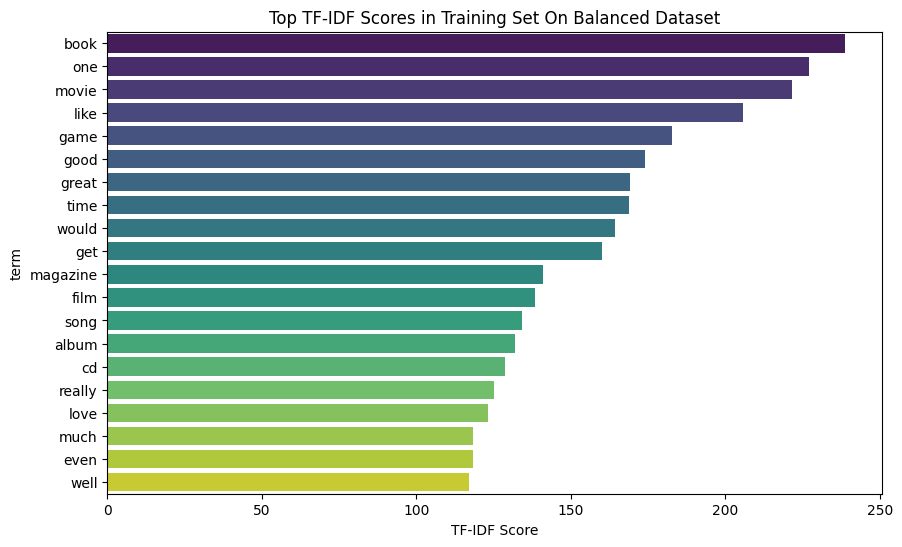

In [ ]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature names
# Extracting the names of the features (terms) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Sum tf-idf frequency of each term through documents
# Summing the TF-IDF scores for each term across all documents in the training set
sums = X_train_vectorized.sum(axis=0)

# Connecting term to its sums frequency
# Creating a list to store terms and their corresponding summed TF-IDF scores
data = []
for col, term in enumerate(feature_names):
    data.append((term, sums[0, col]))  # Appending term and its summed TF-IDF score as a tuple to the list

# Creating a DataFrame to hold the terms and their TF-IDF scores
ranking = pd.DataFrame(data, columns=['term', 'rank'])

# Sorting the DataFrame by the 'rank' column in descending order to get the highest TF-IDF scores at the top
ranking = ranking.sort_values('rank', ascending=False)

# Selecting the top 20 terms with the highest TF-IDF scores
top_terms = ranking.head(20)

# Plotting the top 20 terms
plt.figure(figsize=(10, 6))  # Setting the figure size
sns.barplot(x='rank', y='term', data=top_terms, palette='viridis')  # Creating a bar plot with seaborn
plt.title('Top TF-IDF Scores in Training Set On Balanced Dataset')  # Setting the plot title
plt.xlabel('TF-IDF Score')  # Labeling the x-axis
plt.show()  # Displaying the plot



# Class to train the model

Epoch 1/10
77/77 [==============================] - 16s 165ms/step - loss: 0.5959 - accuracy: 0.7706 - val_loss: 0.4387 - val_accuracy: 0.8540
Epoch 2/10
77/77 [==============================] - 12s 159ms/step - loss: 0.3114 - accuracy: 0.9266 - val_loss: 0.4491 - val_accuracy: 0.8621
Epoch 3/10
77/77 [==============================] - 12s 156ms/step - loss: 0.2146 - accuracy: 0.9703 - val_loss: 0.5044 - val_accuracy: 0.8602
Epoch 4/10
77/77 [==============================] - 12s 152ms/step - loss: 0.1618 - accuracy: 0.9885 - val_loss: 0.5651 - val_accuracy: 0.8611
Epoch 5/10
77/77 [==============================] - 10s 132ms/step - loss: 0.1365 - accuracy: 0.9949 - val_loss: 0.6031 - val_accuracy: 0.8623
Epoch 6/10
77/77 [==============================] - 14s 186ms/step - loss: 0.1233 - accuracy: 0.9954 - val_loss: 0.6098 - val_accuracy: 0.8682
Epoch 7/10
77/77 [==============================] - 12s 157ms/step - loss: 0.1227 - accuracy: 0.9941 - val_loss: 0.6294 - val_accuracy: 0.8583

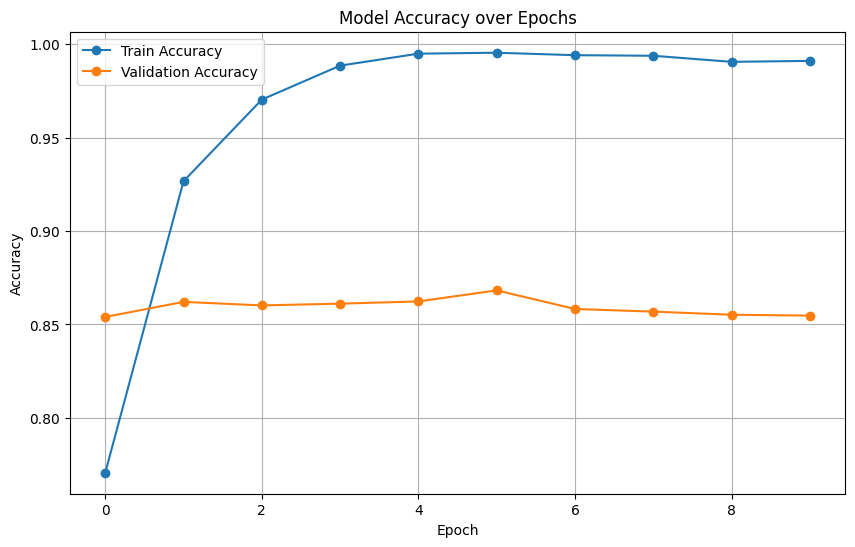

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 2s 20ms/step


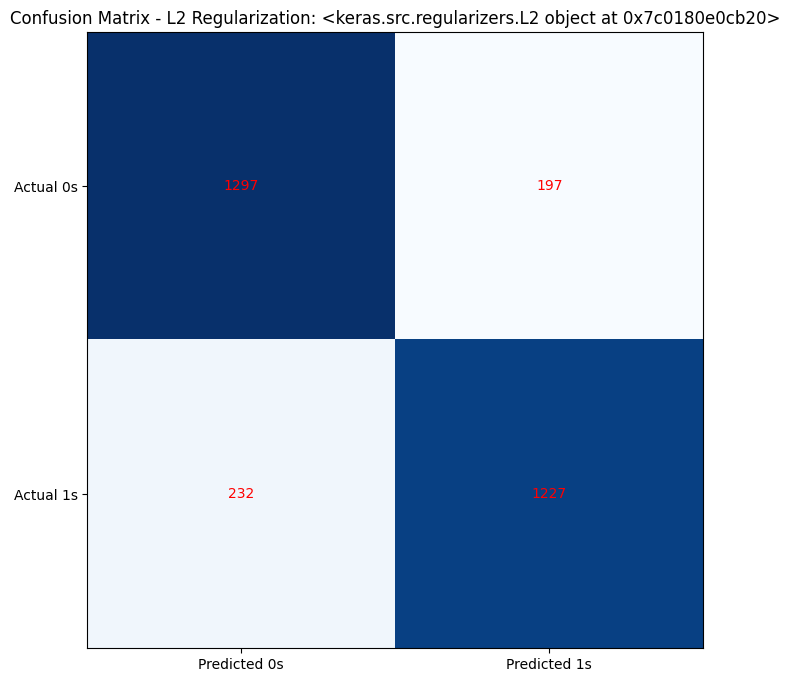

85.4724009481883

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

class SentimentAnalysisModel:
    """
    A class to build, train, evaluate, and use a sentiment analysis model.

    Methods:
    - __init__(self, l2_reg=None): Initialize the model with optional L2 regularization.
    - build_model(self): Build a neural network model with optional L2 regularization.
    - train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=128): Train the model.
    - plot_accuracy(self): Plot the training and validation accuracy over epochs.
    - save_model(self, model_path, vectorizer_path, encoder_path): Save the model, vectorizer, and encoder.
    - load_model(self, model_path, vectorizer_path, encoder_path): Load a trained model, vectorizer, and encoder.
    - predict_texts(self, texts): Predict the sentiment of a list of texts.
    - evaluate(self, X_test, y_test): Evaluate the model on the test data.
    - preprocess_text(self, text): Preprocess a text (tokenize, remove stopwords, lemmatize).
    - plot_confusion_matrix(self, y_true, y_pred): Plot the confusion matrix.
    """

    def __init__(self, l2_reg=None):
        """
        Initialize the model with optional L2 regularization.

        :param l2_reg: L2 regularization factor (default is None)
        """
        self.vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
        self.encoder = LabelEncoder()
        if l2_reg is not None:
            self.l2_reg = l2(l2_reg)
        else:
            self.l2_reg = None
        self.model = self.build_model()
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def build_model(self):
        """
        Build a neural network model with optional L2 regularization.

        :return: Compiled neural network model
        """
        model = Sequential()
        model.add(Dense(512, input_shape=(10000,), activation='relu', kernel_regularizer=self.l2_reg))
        model.add(Dropout(0.5))
        model.add(Dense(256, activation='relu', kernel_regularizer=self.l2_reg))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=128):
        """
        Train the model on the training data and validate on the validation data.

        :param X_train: Training data (features)
        :param y_train: Training data (labels)
        :param X_val: Validation data (features)
        :param y_val: Validation data (labels)
        :param epochs: Number of epochs to train (default is 10)
        :param batch_size: Batch size for training (default is 128)
        """
        X_train_vectorized = self.vectorizer.fit_transform(X_train).todense()
        X_val_vectorized = self.vectorizer.transform(X_val).todense()
        y_train_encoded = to_categorical(self.encoder.fit_transform(y_train))
        y_val_encoded = to_categorical(self.encoder.transform(y_val))
        self.history = self.model.fit(X_train_vectorized, y_train_encoded, epochs=epochs, batch_size=batch_size,
                                      validation_data=(X_val_vectorized, y_val_encoded), verbose=1)

    def plot_accuracy(self):
        """
        Plot the training and validation accuracy over epochs.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['accuracy'], label='Train Accuracy', marker='o')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy', marker='o')
        plt.title('Model Accuracy over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

    def save_model(self, model_path, vectorizer_path, encoder_path):
        """
        Save the trained model, vectorizer, and encoder to disk.

        :param model_path: Path to save the model
        :param vectorizer_path: Path to save the vectorizer
        :param encoder_path: Path to save the encoder
        """
        self.model.save(model_path)
        with open(vectorizer_path, 'wb') as f:
            pickle.dump(self.vectorizer, f)
        with open(encoder_path, 'wb') as f:
            pickle.dump(self.encoder, f)

    def load_model(self, model_path, vectorizer_path, encoder_path):
        """
        Load a trained model, vectorizer, and encoder from disk.

        :param model_path: Path to load the model from
        :param vectorizer_path: Path to load the vectorizer from
        :param encoder_path: Path to load the encoder from
        """
        self.model = load_model(model_path)
        with open(vectorizer_path, 'rb') as f:
            self.vectorizer = pickle.load(f)
        with open(encoder_path, 'rb') as f:
            self.encoder = pickle.load(f)

    def predict_texts(self, texts):
        """
        Predict the sentiment of a list of texts.

        :param texts: List of texts to predict
        :return: Predicted sentiment labels
        """
        preprocessed_texts = [self.preprocess_text(text) for text in texts]
        text_vectorized = self.vectorizer.transform(preprocessed_texts).todense()
        predictions = self.model.predict(text_vectorized)
        predicted_labels_indices = np.argmax(predictions, axis=1)
        predicted_labels = self.encoder.inverse_transform(predicted_labels_indices)
        return predicted_labels

    def evaluate(self, X_test, y_test):
        """
        Evaluate the model on the test data.

        :param X_test: Test data (features)
        :param y_test: Test data (labels)
        :return: Accuracy of the model on the test data
        """
        X_test_vectorized = self.vectorizer.transform(X_test).todense()
        predictions = self.model.predict(X_test_vectorized)
        predicted_labels = np.argmax(predictions, axis=1)
        y_test_encoded = self.encoder.transform(y_test)
        accuracy = accuracy_score(y_test_encoded, predicted_labels) * 100
        self.plot_confusion_matrix(y_test_encoded, predicted_labels)
        return accuracy

    def preprocess_text(self, text):
        """
        Preprocess a text by tokenizing, removing stopwords, and lemmatizing.

        :param text: Text to preprocess
        :return: Preprocessed text
        """
        tokens = word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token not in self.stop_words]
        lemmatized_tokens = [self.lemmatizer.lemmatize(token) for token in filtered_tokens]
        processed_text = ' '.join(lemmatized_tokens)
        return processed_text

    def plot_confusion_matrix(self, y_true, y_pred):
        """
        Plot the confusion matrix for the predictions.

        :param y_true: True labels
        :param y_pred: Predicted labels
        """
        cm = confusion_matrix(y_true, y_pred)
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(cm, cmap=plt.cm.Blues)
        ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
        ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
        ax.set_ylim(1.5, -0.5)
        for i in range(2):
            for j in range(2):
                ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
        plt.title(f'Confusion Matrix - L2 Regularization: {self.l2_reg if self.l2_reg else "Not used"}')
        plt.show()

# Using the SentimentAnalysisModel class with regularization.
model = SentimentAnalysisModel(l2_reg=0.00015)
model.train(X_train, y_train, X_val, y_val)
model.plot_accuracy()
model.save_model('model.h5', 'vectorizer.pkl', 'encoder.pkl')
model.load_model('model.h5', 'vectorizer.pkl', 'encoder.pkl')
model.evaluate(X_test, y_test)  # Assuming X_test and y_test are defined